In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
train, test = tf.keras.datasets.mnist.load_data()
mnist_images, mnist_labels = train
mnist_test_images, mnist_test_labels = test

print(mnist_images.shape)
print(mnist_test_images.shape)

mnist_images = mnist_images.flatten().reshape(60000,784)
mnist_test_images = mnist_test_images.flatten().reshape(10000,784)

print(mnist_images.shape)
print(mnist_test_images.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


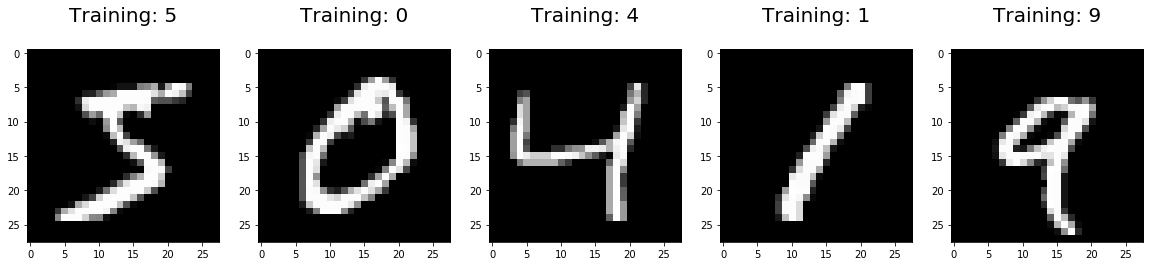

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist_images[0:5], mnist_labels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logisticRegr = LogisticRegression(solver='lbfgs', multi_class='multinomial',
                                  verbose=1, max_iter=100)

In [7]:
logisticRegr.fit(mnist_images, mnist_labels)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)

In [8]:
predictions = logisticRegr.predict(mnist_test_images)
score = logisticRegr.score(mnist_test_images, mnist_test_labels)
print(score)

0.9255


In [9]:
# Display metrics
# Precision measures the impact of false positives: TP/(TP+FP)
# Recall measures the impact of false negatives : TP/(TP+FN)
# F1 is the weighted average of precision and recall: (2*Recall*Precision)/(Recall+Precision)

from sklearn import metrics
print(metrics.classification_report(mnist_test_labels, predictions))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       980
          1       0.97      0.98      0.97      1135
          2       0.93      0.90      0.91      1032
          3       0.90      0.91      0.91      1010
          4       0.93      0.93      0.93       982
          5       0.90      0.87      0.89       892
          6       0.94      0.95      0.95       958
          7       0.93      0.93      0.93      1028
          8       0.87      0.89      0.88       974
          9       0.91      0.91      0.91      1009

avg / total       0.93      0.93      0.93     10000



In [10]:
# Display confusion matrix
print(metrics.confusion_matrix(mnist_test_labels, predictions))

[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


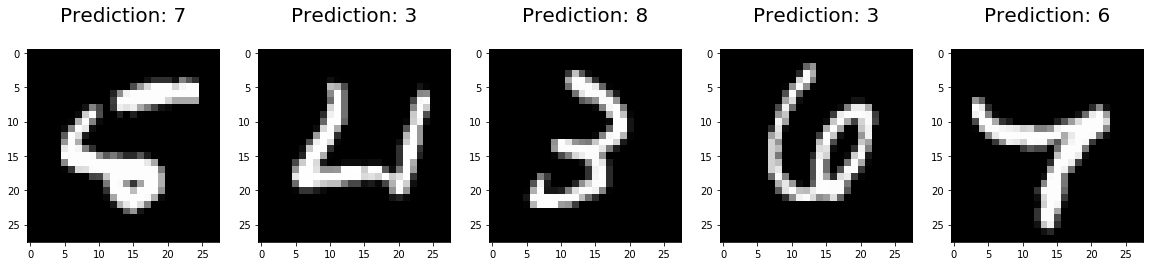

In [11]:
# Show some mispredicted samples
index = 0
misclassifiedIndexes = []
misclassifiedLabels = []
for label, predict in zip(mnist_test_labels, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
        misclassifiedLabels.append(predict)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(mnist_test_images[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Prediction: %s\n' % misclassifiedLabels[badIndex], fontsize = 20)
plt.show()